## **INTRODUÇÃO**

A prática desenvolvida no presente notebook objetiva solucionar o problema de otimização para buscar uma liga ternária de forma xA.yB.zC que possua o maior custo e o menor peso atômico possíveis. O enunciado delimita que a massa total da liga deve ser de 100g e cada elemento precisa ter uma contribuição de ao menos 5g.

Algo interessante acerca dessa atividade é que ela possibilita abordar um conceito muito instigante: A `fronteira de Pareto`. Como sobredito, a tarefa compreende um entrave que envolve concomitantemente maximização (do custo) quanto minimização (do peso atômico). Nesse sentido, temos um problema de otimização multiobjetivo, já que visamos otimizar dois atributos do material (liga ternária). É nesse contexto que entra a `fronteira de Pareto`, que consiste em um conjunto de soluções ótimas estabelecendo um equilíbrio entre a maximização e a minimização de custos no projeto e na programação de uma planta de processamento de lotes multiuso propostas. Tal fronteira representa um meio termo entre os objetivos estipulados, ajudando a encontrar uma otimização que satisfaça de maneira adequada ambos os problemas de otimização abordados.[2,3]

Visando resolver o problema proposto, partiu-se das funções definidas durante a atividade 4.13. Assim, a base das funções de mutação, cruzamento e seleção se manteve a mesma, contudo, foi necessário alterar o modo de reparação utilizado para garantir que os indivíduos fossem válidos, de modo a considerar a razão $\frac{\text{preço}}{\text{peso}}$ de cada elemento. Assim, se o peço superou 100 g, a diferença para esse valor (o quanto passou) é reduzido do elemento do indivíduo que apresenta o menor valor para essa razão, já se estiver abaixo de 100 g, o processo inverso é feito. Para além disso, a função objetivo também foi alterada visando a maximização dessa relação $\frac{\text{preço}}{\text{peso}}$.

---

## **AUTORES E CONTRIBUIÇÕES**

**Autores:**

* Caio Matheus Leão Dantas
* Raquel de Godoy Vianna

**Contribuições:** A atividade foi desenvolvida em conjunto, sobretudo no que tange à compreensão do problema e à aplicação em código, enquanto a parte teórica foi realizada separadamente, de modo que ambos contribuíram igualmente para o desenvolvimento da tarefa.

---

## **CÓDIGOS**

O primeiro passo a ser realizado é a importação das bibliotecas necessárias para o desenvolvimento do código e o recebimento das funções definidas no arquivo :"*.py*":

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from funcoes_feras import populacao_ligas, funcao_objetivo_pop_ligas_leves, selecao_torneio_max, cruzamentos_uniformes, mutacao_ligas_leves

E a definição dos hiperparâmetros que serão utilizados no processo de evolução por gerações:

In [2]:
TAMANHO_POPULACAO = 100
TAMANHO_TORNEIO = 3
NUM_GERACOES = 50
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05

Definimos o dicionário disponibilizado associado ao preço dos elementos em dólares por quilograma:

In [3]:
preco = {
    "H": 1.39, "He": 24, "Li": 85.6, "Be": 857, "B": 3.68, "C": 0.122, "N": 0.14, "O": 0.154,
    "F": 2.16, "Ne": 240, "Na": 3.43, "Mg": 2.32, "Al": 1.79, "Si": 1.7, "P": 2.69, "S": 0.0926,
    "Cl": 0.082, "Ar": 0.931, "K": 13.6, "Ca": 2.35, "Sc": 3460, "Ti": 11.7, "V": 385, "Cr": 9.4,
    "Mn": 1.82, "Fe": 0.424, "Co": 32.8, "Ni": 13.9, "Cu": 6, "Zn": 2.55, "Ga": 148, "Ge": 1010,
    "As": 1.31, "Se": 21.4, "Br": 4.39, "Kr": 290, "Rb": 15500, "Sr": 6.68, "Y": 31, "Nb": 85.6,
    "Mo": 40.1, "Tc": 100000, "Ru": 10600, "Rh": 147000, "Pd": 49500, "Ag": 521, "Cd": 2.73,
    "In": 167, "Sn": 18.7, "Sb": 5.79, "Te": 63.5, "I": 35, "Xe": 1800, "Cs": 61800, "Ba": 0.275,
    "La": 4.92, "Ce": 4.71, "Pr": 103, "Nd": 57.5, "Pm": 460000, "Sm": 13.9, "Eu": 31.4, "Gd": 28.6,
    "Tb": 658, "Dy": 307, "Ho": 57.1, "Er": 26.4, "Tm": 3000, "Yb": 17.1, "Lu": 643, "Hf": 900,
    "Ta": 312, "W": 35.3, "Re": 4150, "Os": 12000, "Ir": 56200, "Pt": 27800, "Hg": 30.2,
    "Tl": 4200, "Pb": 2, "Bi": 6.36, "Po": 49200000000000, "Ac": 29000000000000, "Th": 287,
    "Pa": 280000, "U": 101, "Np": 660000, "Pu": 6490000, "Am": 750000, "Cm": 160000000000,
    "Bk": 185000000000, "Cf": 185000000000
}

E, de acordo com o requisitado no problema, obtemos o preço em dólares por grama:

In [4]:
for i in preco:
  preco[i] = preco[i] * 1000

preco

{'H': 1390.0,
 'He': 24000,
 'Li': 85600.0,
 'Be': 857000,
 'B': 3680.0,
 'C': 122.0,
 'N': 140.0,
 'O': 154.0,
 'F': 2160.0,
 'Ne': 240000,
 'Na': 3430.0,
 'Mg': 2320.0,
 'Al': 1790.0,
 'Si': 1700.0,
 'P': 2690.0,
 'S': 92.60000000000001,
 'Cl': 82.0,
 'Ar': 931.0,
 'K': 13600.0,
 'Ca': 2350.0,
 'Sc': 3460000,
 'Ti': 11700.0,
 'V': 385000,
 'Cr': 9400.0,
 'Mn': 1820.0,
 'Fe': 424.0,
 'Co': 32800.0,
 'Ni': 13900.0,
 'Cu': 6000,
 'Zn': 2550.0,
 'Ga': 148000,
 'Ge': 1010000,
 'As': 1310.0,
 'Se': 21400.0,
 'Br': 4390.0,
 'Kr': 290000,
 'Rb': 15500000,
 'Sr': 6680.0,
 'Y': 31000,
 'Nb': 85600.0,
 'Mo': 40100.0,
 'Tc': 100000000,
 'Ru': 10600000,
 'Rh': 147000000,
 'Pd': 49500000,
 'Ag': 521000,
 'Cd': 2730.0,
 'In': 167000,
 'Sn': 18700.0,
 'Sb': 5790.0,
 'Te': 63500.0,
 'I': 35000,
 'Xe': 1800000,
 'Cs': 61800000,
 'Ba': 275.0,
 'La': 4920.0,
 'Ce': 4710.0,
 'Pr': 103000,
 'Nd': 57500.0,
 'Pm': 460000000,
 'Sm': 13900.0,
 'Eu': 31400.0,
 'Gd': 28600.0,
 'Tb': 658000,
 'Dy': 307000,
 'Ho'

Entretanto, como nesse problema, utilizamos como outro parâmetro o peso atômico, também definimos o dicionário associado a ele:

In [5]:
peso_atomico = {
    "H": 1.008,
    "He": 4.002602,
    "Li": 6.94,
    "Be": 9.0121831,
    "B": 10.81,
    "C": 12.011,
    "N": 14.007,
    "O": 15.999,
    "F": 18.998403163,
    "Ne": 20.1797,
    "Na": 22.98976928,
    "Mg": 24.305,
    "Al": 26.9815385,
    "Si": 28.085,
    "P": 30.973761998,
    "S": 32.06,
    "Cl": 35.45,
    "Ar": 39.948,
    "K": 39.0983,
    "Ca": 40.078,
    "Sc": 44.955908,
    "Ti": 47.867,
    "V": 50.9415,
    "Cr": 51.9961,
    "Mn": 54.938044,
    "Fe": 55.845,
    "Co": 58.933194,
    "Ni": 58.6934,
    "Cu": 63.546,
    "Zn": 65.38,
    "Ga": 69.723,
    "Ge": 72.63,
    "As": 74.921595,
    "Se": 78.971,
    "Br": 79.904,
    "Kr": 83.798,
    "Rb": 85.4678,
    "Sr": 87.62,
    "Y": 88.90584,
    "Nb": 92.90637,
    "Mo": 95.95,
    "Tc": 97.90721,
    "Ru": 101.07,
    "Rh": 102.9055,
    "Pd": 106.42,
    "Ag": 107.8682,
    "Cd": 112.414,
    "In": 114.818,
    "Sn": 118.71,
    "Sb": 121.76,
    "Te": 127.6,
    "I": 126.90447,
    "Xe": 131.293,
    "Cs": 132.90545196,
    "Ba": 137.327,
    "La": 138.90547,
    "Ce": 140.116,
    "Pr": 140.90766,
    "Nd": 144.242,
    "Pm": 144.91276,
    "Sm": 150.36,
    "Eu": 151.964,
    "Gd": 157.25,
    "Tb": 158.92535,
    "Dy": 162.5,
    "Ho": 164.93033,
    "Er": 167.259,
    "Tm": 168.93422,
    "Yb": 173.045,
    "Lu": 174.9668,
    "Hf": 178.49,
    "Ta": 180.94788,
    "W": 183.84,
    "Re": 186.207,
    "Os": 190.23,
    "Ir": 192.217,
    "Pt": 195.084,
    "Hg": 200.592,
    "Tl": 204.38,
    "Pb": 207.2,
    "Bi": 208.9804,
    "Po": 209.0,
    "Ac": 227.0,
    "Th": 232.0377,
    "Pa": 231.03588,
    "U": 238.02891,
    "Np": 237.0,
    "Pu": 244.0,
    "Am": 243.0,
    "Cm": 247.0,
    "Bk": 247.0,
    "Cf": 251.0
}


No processo de desenvolvimento, iremos adotar como critério de análise a relação entre preço e peso atômico, de forma que criaremos um dicionário de "preço atômico", que armazena essa relação:

In [6]:
chaves = list(preco.keys())
razoes = []
for custo, peso in zip(list(preco.values()), list(peso_atomico.values())):
  valor = custo/peso
  razoes.append(valor)

dic_precos_atomicos = dict(zip(chaves, razoes))
dic_precos_atomicos

{'H': 1378.968253968254,
 'He': 5996.099537251018,
 'Li': 12334.2939481268,
 'Be': 95093.496269511,
 'B': 340.4255319148936,
 'C': 10.157355757222547,
 'N': 9.995002498750624,
 'O': 9.625601600100007,
 'F': 113.69376581115351,
 'Ne': 11893.140135879126,
 'Na': 149.19679959485003,
 'Mg': 95.453610368237,
 'Al': 66.34165801924156,
 'Si': 60.53053231262239,
 'P': 86.8477003269314,
 'S': 2.8883343730505304,
 'Cl': 2.31311706629055,
 'Ar': 23.305296885951737,
 'K': 347.84121048741247,
 'Ca': 58.635660462098905,
 'Sc': 76964.30022056277,
 'Ti': 244.42726721958763,
 'V': 7557.688721376481,
 'Cr': 180.78278947844166,
 'Mn': 33.12822713527988,
 'Fe': 7.592443370042081,
 'Co': 556.5624018273979,
 'Ni': 236.8239018356408,
 'Cu': 94.41979038806534,
 'Zn': 39.00275313551545,
 'Ga': 2122.685483986633,
 'Ge': 13906.099407958145,
 'As': 17.484945428617745,
 'Se': 270.98555165820363,
 'Br': 54.94092911493793,
 'Kr': 3460.703119406191,
 'Rb': 181354.84942867374,
 'Sr': 76.23830175758958,
 'Y': 348.68350

Definimos uma população de composições de ligas possíveis, compostas por cada um dos três elementos seguidos por suas quantidades, no modelo ("A", "B", "C", "x", "y", "z") para um elemento xA.yB.zC:

In [7]:
populacao = populacao_ligas(TAMANHO_POPULACAO, preco)

Com tudo já definido, realizamos o processo evolutivo por épocas com os processos de seleção, cruzamento e mutação, reparando os indivíduos se necessário:

In [8]:
hall_da_fama = []
historico_fitness = []

for n in range(NUM_GERACOES):

    # Seleção
    fitness = funcao_objetivo_pop_ligas_leves(populacao, preco, peso_atomico)
    selecionados = selecao_torneio_max(populacao, fitness, TAMANHO_TORNEIO)

    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = cruzamentos_uniformes(pai, mae, CHANCE_DE_CRUZAMENTO, list(preco.keys()))
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)

    # Mutação
    mutacao_ligas_leves(proxima_geracao, CHANCE_DE_MUTACAO, list(preco.keys()), preco)

    # Atualização do hall da fama
    fitness = funcao_objetivo_pop_ligas_leves(proxima_geracao, preco, peso_atomico)

    maior_fitness = max(fitness)
    indice = fitness.index(maior_fitness)
    hall_da_fama.append(proxima_geracao[indice])

    # Armazenamento dos fitness
    historico_fitness.append(max(fitness))

    # Encerramento
    populacao = proxima_geracao

A partir da evolução por épocas, obtemos o indivíduo melhor avaliado e qual a configuração de elementos associada a ele:

In [9]:
fitness = funcao_objetivo_pop_ligas_leves(hall_da_fama, preco, peso_atomico)
maior_fitness = max(fitness)
indice = fitness.index(maior_fitness)
melhor_individuo_observado = hall_da_fama[indice]

melhor_individuo_observado

[18, 77, 5, 'Ac', 'Po', 'Bk']

###### * Esse resultado obtido aparenta ser um pouco "estranho", mas segue a lógica exposta da `"Fronteira de Pareto"`, sendo a teoria já explicada na seção de Introdução e o resultado em si discutido na seção de Conclusão.

A partir disso, podemos realizar a plotagem da evolução do fitness obtido em cada uma das gerações, entendendo o desempenho do modelo:

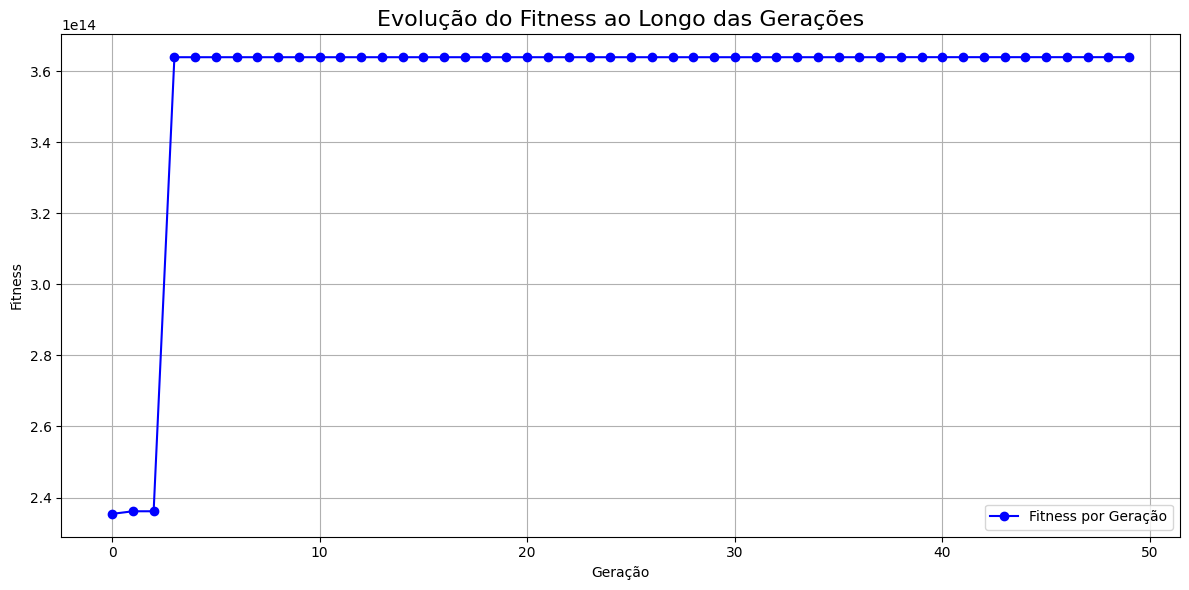

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(historico_fitness, label='Fitness por Geração', color='blue', marker='o', linestyle='-')
plt.title('Evolução do Fitness ao Longo das Gerações', fontsize=16)
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

---

## **CONCLUSÃO**

A partir do desenvolvimento dessa atividade, foi possível adentrar em um ramo "novo" para ambos os autores, que seria a otimização multi-objetivos. A proposição do problema de uma liga que possui a melhor combinação possível entre os critérios de preço e peso atômico, implica um processo de otimização tanto para o lado da minimização, quanto para o lado da maximização, de forma que a melhoria de um atributo frequentemente pode exigir o sacrifício no outro.

Nesse contexto, o resultado obtido a partir do Algoritmo Genético desenvolvido deve ser compreendido através da ótica da `Fronteira de Pareto`. Basicamente, o algoritmo, nesse caso, não é desenvolvido para encontrar uma única solução ótima, mas sim tornar possível a definição de uma fronteira entre os valores considerados ótimos ou não, de forma que o intuito do algoritmo foge de mapear toda a fronteira de soluções ótimas, mas sim de convergir eficientemente para um único ponto de excelência sobre ou próximo a ela.

Portanto, a liga final encontrada, que possuía como foco a relação preço/peso, não busca ser uma solução somente de alto "fitness", mas um ponto que equilibre a relação entre valor e leveza e a avalie como válida em relação à fronteira dos valores ótimos obtida.

---

## **REFERÊNCIAS**

**[1]** CASSAR, Daniel. Redes Neurais e Algoritmos Genéticos. 2025. Material de Aula.

**[2]** Pareto Frontier - an overview | ScienceDirect Topics. https://www.sciencedirect.com/topics/computer-science/pareto-frontier. Acedido 11 de junho de 2025.

**[3]** Pareto Frontier - an overview | ScienceDirect Topics. https://www.sciencedirect.com/topics/engineering/pareto-frontier. Acedido 11 de junho de 2025.

**[4]** Pareto Front for Two Objectives. MATLAB Help Center. Disponível em: https://www.mathworks.com/help/gads/pareto-front-for-two-objectives.html.

**[5]** DATTA, Subham. Defining Multiobjective Algorithms and Pareto Frontiers. Baeldung  Disponível em: https://www.baeldung.com/cs/defining-multiobjective-algorithms-and-pareto-frontiers.